In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
# data= pd.read_csv('/content/EVANS-EFCO_clean_with_weather_and_2018.csv')

In [ ]:
# data.head()


In [ ]:
# data.describe()

In [ ]:
# data.dtypes

In [ ]:
# data.isnull().sum()

In [ ]:
# data = data.dropna()

In [ ]:
# # Change the format to match the date strings
# data['DATE(HOURS/DAY/MONTH/YEAR)'] = pd.to_datetime(data['DATE(HOURS/DAY/MONTH/YEAR)'], format='%d-%m-%Y %H:%M')

In [ ]:
# data['DATE(HOURS/DAY/MONTH/YEAR)'] = pd.to_datetime(data['DATE(HOURS/DAY/MONTH/YEAR)'], format='%d-%m-%y %H:%M')

# # Extract Month, Year, Day, and Hour


# data['Year'] = data['DATE(HOURS/DAY/MONTH/YEAR)'].dt.year
# data['Month'] = data['DATE(HOURS/DAY/MONTH/YEAR)'].dt.month
# data['Day'] = data['DATE(HOURS/DAY/MONTH/YEAR)'].dt.day
# data['Hour'] = data['DATE(HOURS/DAY/MONTH/YEAR)'].dt.hour

In [ ]:
# data.set_index('DATE(HOURS/DAY/MONTH/YEAR)', inplace=True)


In [ ]:
# plt.figure(figsize=(10, 6))
# sns.histplot(data['ENERGY CONSUMPTION'], bins=30, kde=True)
# plt.title('Distribution of Energy Consumption')
# plt.xlabel('Energy Consumption (kWh)')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# print(data.columns)

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=data, x='WIND DIRECTION(DEGREE)', y='ENERGY CONSUMPTION')
# plt.title('Wind Direction vs. Energy Consumption')
# plt.xlabel('Wind Direction (degrees)')
# plt.ylabel('Energy Consumption (kWh)')
# plt.show()

In [ ]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf



In [ ]:
energy = pd.read_csv('/content/energy_dataset.csv')
energy.head()

In [ ]:
energy.describe().T
energy.rename(columns={
   'total load actual':'Energy Consumption'

}, inplace=True)


In [ ]:

colnames = ['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat',
           'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine',
           'generation wind offshore', 'forecast wind offshore eday ahead', 'forecast solar day ahead',
            'forecast wind onshore day ahead','price actual','total load forecast','price day ahead']
energy = energy.drop(colnames, axis = 1)

# def check_Nans_Dups(df_input):

#     print('Number of Nans in each column :')

#     print(df_input.isnull().sum())
#     print()/
1#     print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
#     return
# check_Nans_Dups(df_energy)




In [ ]:
energy.head()

In [ ]:
energy.isnull().sum()

In [ ]:
energy['time'] = pd.to_datetime(energy['time'])
energy = energy.set_index('time')
energy


In [ ]:
energy[energy.isna().any(axis = 1)]

In [ ]:

energy.interpolate(method='linear', limit_direction='forward', inplace = True)

In [ ]:
energy.isnull().sum()

Text(0, 0.5, 'Energy Consumption')

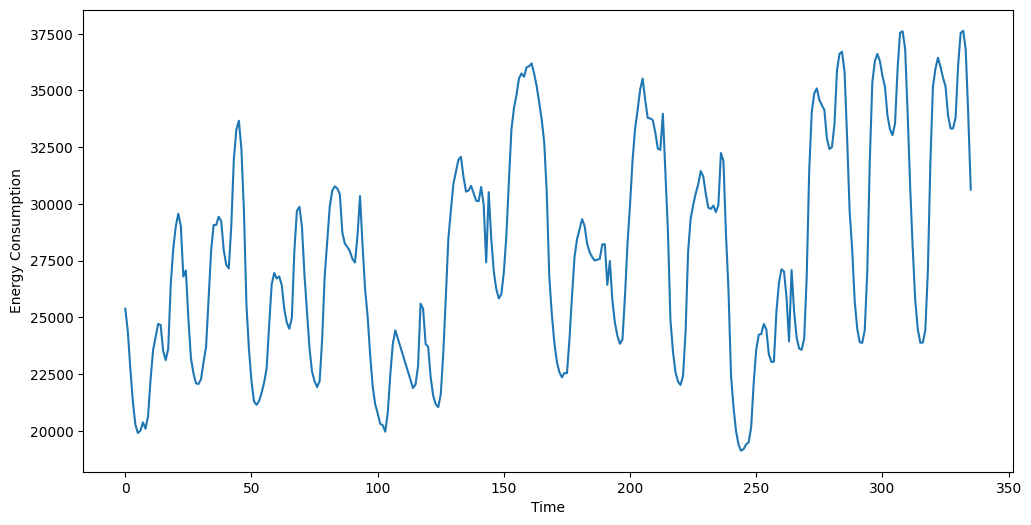

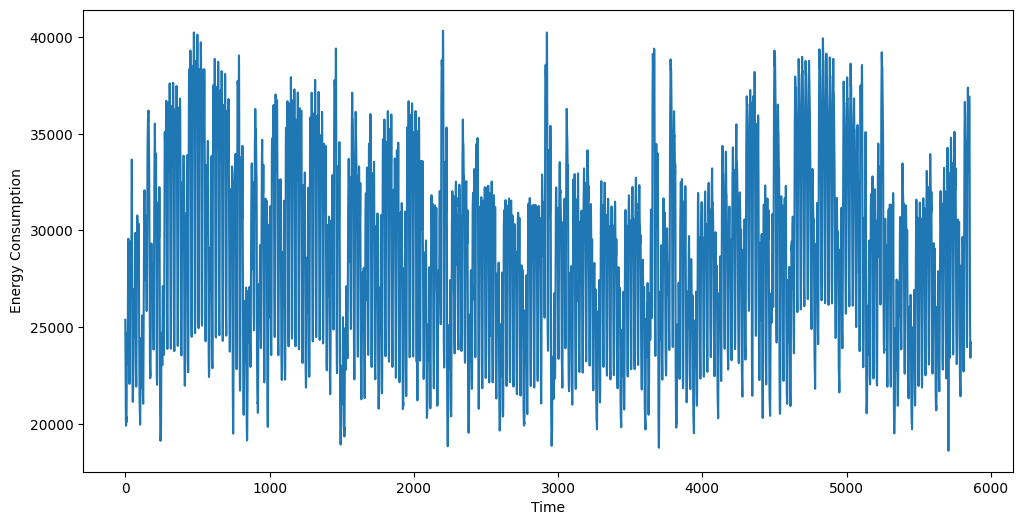

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(energy['Energy Consumption'][:24*7*2])
plt.xlabel('Time')
plt.ylabel('Energy Consumption')

plt.figure(figsize=(12,6))

plt.plot(energy['Energy Consumption'][:])
plt.xlabel('Time')
plt.ylabel('Energy Consumption')

In [ ]:

def feat_corr(input_df):
    corr = input_df.corr()
    plt.figure(figsize=(15,12))

    g=sns.heatmap(corr,annot=True,cmap="BrBG", vmin=-1, vmax=1)
    plt.title('Feature Correlation')


    return plt.show()
feat_corr(energy)


ValueError: could not convert string to float: '2015-01-01 00:00:00+01:00'

In [ ]:
energy["generation fossil total"] = energy['generation fossil hard coal'] + energy['generation fossil brown coal/lignite']
energy.drop(['generation fossil hard coal', 'generation fossil brown coal/lignite'], axis = 1, inplace = True)


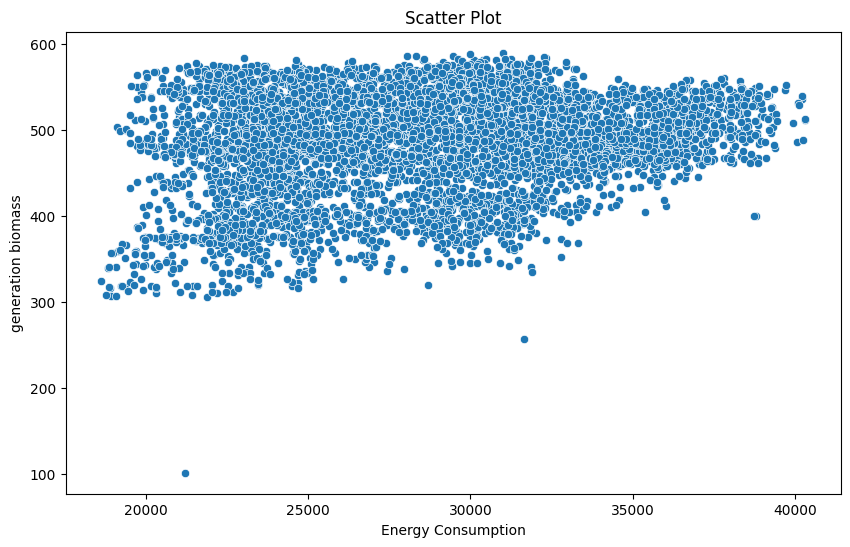

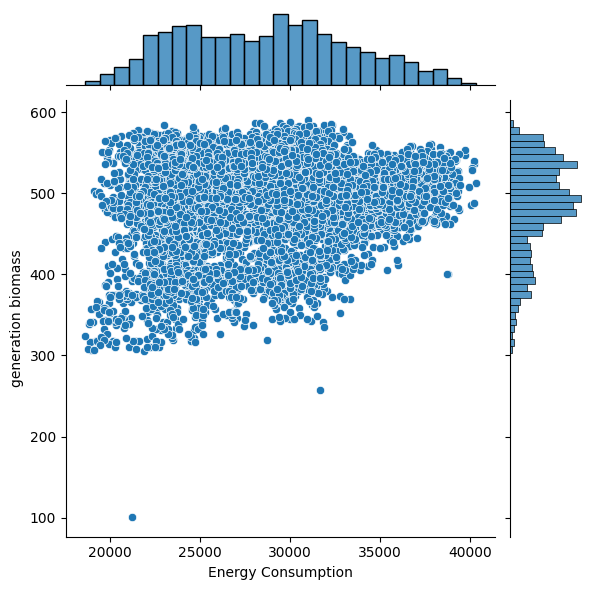

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy Consumption', y='generation biomass' , data=energy)

# Add labels and title
plt.xlabel('Energy Consumption')
plt.ylabel('generation biomass')
plt.title('Scatter Plot')

# Show the plot
plt.show()

sns.jointplot(x='Energy Consumption', y='generation biomass', data=energy)
plt.show()

In [ ]:
energy.columns

Index(['time', 'generation biomass', 'generation fossil gas',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'Energy Consumption',
       'generation fossil total'],
      dtype='object')

In [ ]:
feat_corr(energy)

ValueError: could not convert string to float: '2015-01-01 00:00:00+01:00'

In [ ]:

df_weather = pd.read_csv('/content/weather_features.csv')

In [ ]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_temp = df_weather.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])


In [ ]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n


In [ ]:
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])
df_weather.drop(["dt_iso"] , axis = 1, inplace = True)
df_weather = df_weather.set_index('time')


In [ ]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_weather['city_name'] = le.fit_transform(df_weather['city_name'])

In [ ]:
df_weather['weather_id'].unique()

array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 201., 211., 520., 300., 741.,  nan])

In [ ]:
df_weather['weather_id'].unique()

array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 201., 211., 520., 300., 741.,  nan])

In [ ]:
col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']

df_weather.drop(col_drop_name, axis = 1 , inplace = True)

In [ ]:
def check_Nans_Dups(df_input):

    print('Number of Nans in each column :')

    print(df_input.isnull().sum())
    print()
    print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
    return
check_Nans_Dups(df_weather)

Number of Nans in each column :
city_name     0
temp          0
pressure      1
humidity      1
wind_speed    1
wind_deg      1
rain_1h       1
rain_3h       1
snow_3h       1
clouds_all    1
dtype: int64

Number of duplicates in the dataframe : 807


In [ ]:
df_weather = df_weather.reset_index().drop_duplicates()

In [ ]:
df_weather

,time,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
0,2015-01-01 00:00:00+01:00,1,270.475,1001,77,1,62,0.0,0.0,0.0,0
1,2015-01-01 01:00:00+01:00,1,270.475,1001,77,1,62,0.0,0.0,0.0,0
2,2015-01-01 02:00:00+01:00,1,269.686,1002,78,0,23,0.0,0.0,0.0,0
3,2015-01-01 03:00:00+01:00,1,269.686,1002,78,0,23,0.0,0.0,0.0,0
4,2015-01-01 04:00:00+01:00,1,269.686,1002,78,0,23,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
56384,2017-05-16 11:00:00+02:00,0,294.740,1027,46,1,340,0.0,0.0,0.0,0
56385,2017-05-16 12:00:00+02:00,0,296.320,1026,36,1,90,0.0,0.0,0.0,0
56386,2017-05-16 13:00:00+02:00,0,298.340,1026,31,1,120,0.0,0.0,0.0,0
56387,2017-05-16 14:00:00+02:00,0,298.930,1026,28,2,200,0.0,0.0,0.0,0


In [ ]:
# Loading weather data
df_weather = pd.read_csv('/content/weather_features.csv')
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [ ]:
df_temp = df_weather.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])

In [ ]:
df_temp

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,33,0,33,2
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,33,0,33,2
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,33,0,33,2
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,33,0,33,2
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,33,0,33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,33,0,33,2
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,33,0,33,2
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,33,0,33,2
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,33,0,33,2


In [ ]:

col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']
# col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon']
df_weather.drop(col_drop_name, axis = 1 , inplace = True)


In [ ]:
# Checking Nans and duplicates in each columns
def check_Nans_Dups(df_input):

    print('Number of Nans in each column :')

    print(df_input.isnull().sum())
    print()
    print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
    return

check_Nans_Dups(df_weather)


Number of Nans in each column :
dt_iso        0
city_name     0
temp          0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
dtype: int64

Number of duplicates in the dataframe : 3076


In [ ]:
df_weather = df_weather.reset_index().drop_duplicates()
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])
df_weather.drop(["dt_iso"] , axis = 1, inplace = True)
df_weather = df_weather.set_index('time')
df_weather.drop(["index"] , axis = 1, inplace = True)

In [ ]:
df_weather

,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
time,,,,,,,,,,
2015-01-01 00:00:00+01:00,Valencia,270.475,1001,77,1,62,0.0,0.0,0.0,0
2015-01-01 01:00:00+01:00,Valencia,270.475,1001,77,1,62,0.0,0.0,0.0,0
2015-01-01 02:00:00+01:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0
2015-01-01 03:00:00+01:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0
2015-01-01 04:00:00+01:00,Valencia,269.686,1002,78,0,23,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,Seville,287.760,1028,54,3,30,0.0,0.0,0.0,0
2018-12-31 20:00:00+01:00,Seville,285.760,1029,62,3,30,0.0,0.0,0.0,0
2018-12-31 21:00:00+01:00,Seville,285.150,1028,58,4,50,0.0,0.0,0.0,0


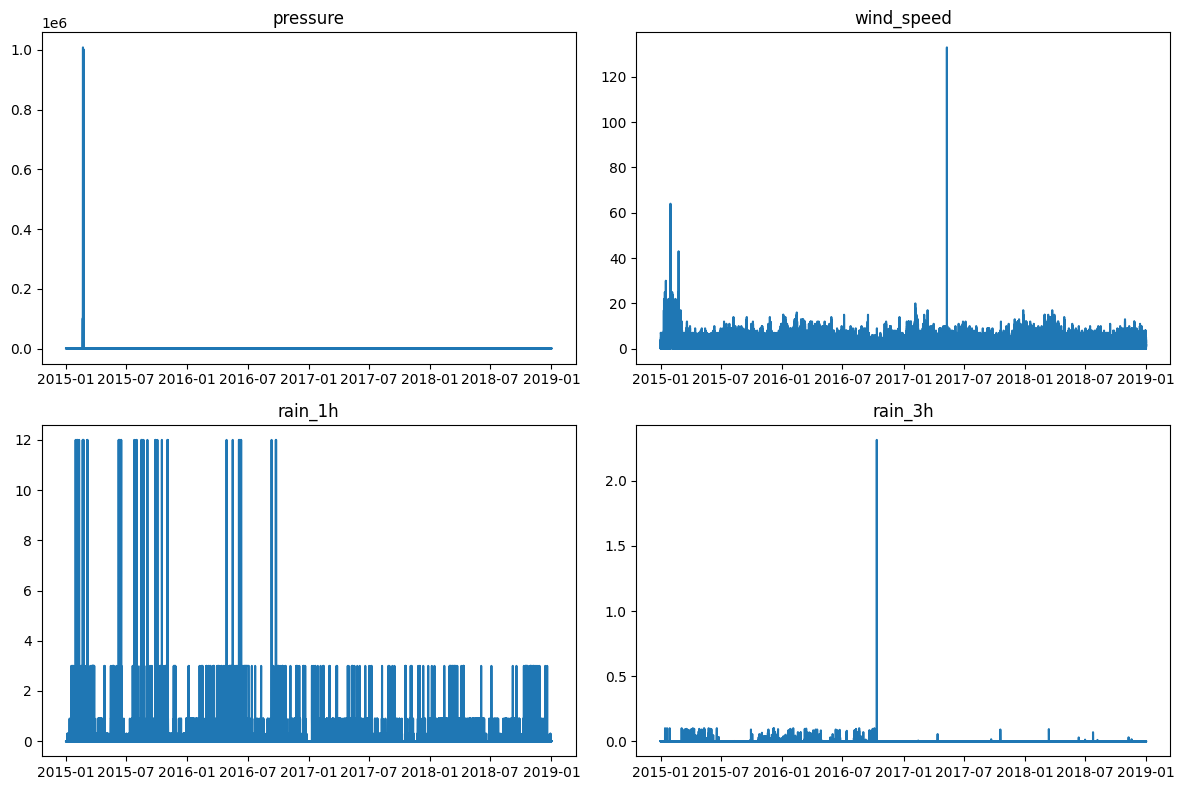

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))


columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']


for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.plot(df_weather.index, df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

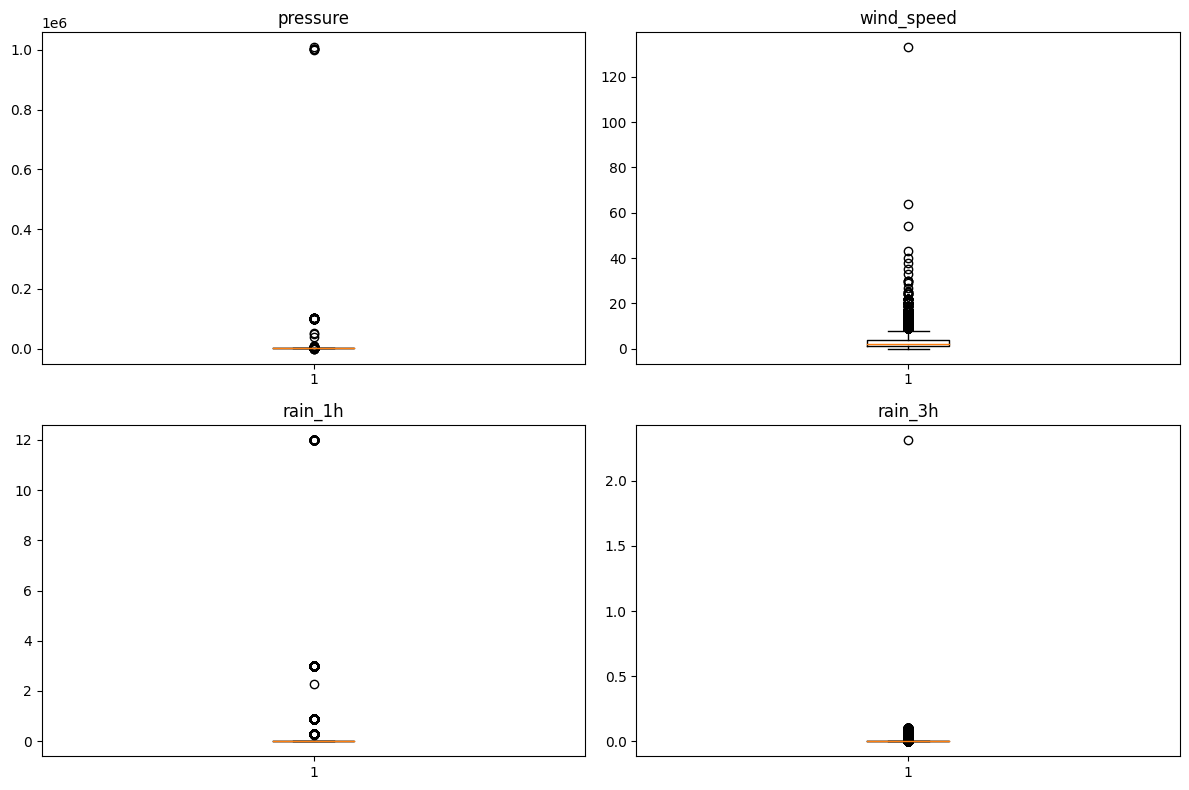

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))


columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']


for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
df_weather.describe()

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
count,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292
std,8.026199,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129
min,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,283.670000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000
50%,289.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000
75%,295.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000
max,315.600000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000


In [ ]:
df_weather.loc[df_weather['pressure']  > 1080,  'pressure'] = np.nan
df_weather.loc[df_weather['pressure']   < 870,  'pressure'] = np.nan
df_weather.loc[df_weather['wind_speed'] > 113, 'wind_speed'] = np.nan

df_weather.interpolate(method ='linear', limit_direction ='forward', inplace = True)

In [ ]:
df_weather.describe()

,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
count,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,1016.186108,68.423457,2.469876,166.591190,0.075492,0.000380,0.004763,25.073292
std,8.026199,12.367948,21.902888,2.073099,116.611927,0.398847,0.007288,0.222604,30.774129
min,262.240000,918.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,283.670000,1013.000000,53.000000,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000
50%,289.150000,1018.000000,72.000000,2.000000,177.000000,0.000000,0.000000,0.000000,20.000000
75%,295.150000,1022.000000,87.000000,4.000000,270.000000,0.000000,0.000000,0.000000,40.000000
max,315.600000,1080.000000,100.000000,64.000000,360.000000,12.000000,2.315000,21.500000,100.000000


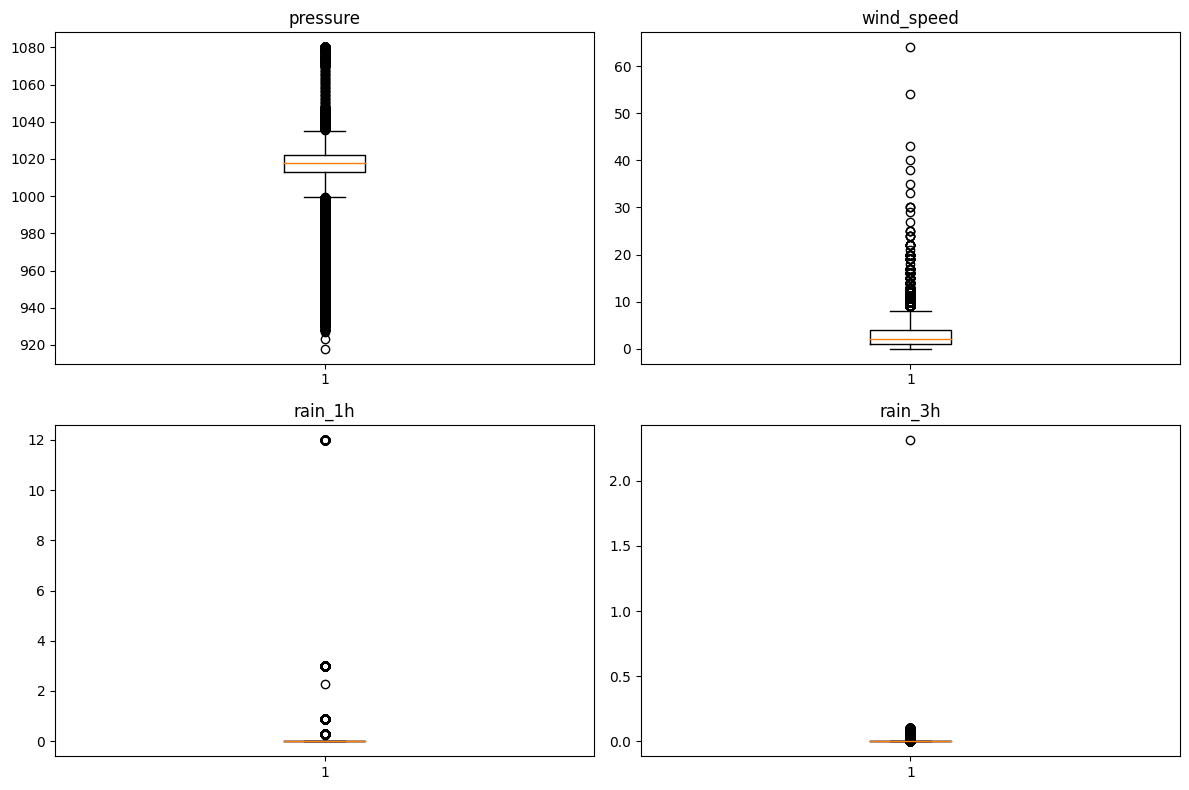

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))


columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:

df_weather.drop(['rain_3h'], axis = 1 , inplace = True)

In [ ]:
check_Nans_Dups(df_weather)

Number of Nans in each column :
city_name     0
temp          0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
snow_3h       0
clouds_all    0
dtype: int64

Number of duplicates in the dataframe : 13123


In [ ]:
df_weather_cleaned = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='first')

In [ ]:
print(f'Number of samples in df_energy is {energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather_cleaned.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 17617
Number of samples in df_weather in Valencia is 35064
Number of samples in df_weather in Madrid is 35064
Number of samples in df_weather in Bilbao is 35064
Number of samples in df_weather in  Barcelona is 35064
Number of samples in df_weather in Seville is 35064


In [ ]:
df_weather_all_cities = [grouped_weather.get_group(x) for x in grouped_weather.groups]
df_weather_all_cities[0]

,time,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all
107363,2015-01-01 00:00:00+01:00,Barcelona,281.625,1035.0,100,7.0,58,0.0,0.0,0
107364,2015-01-01 01:00:00+01:00,Barcelona,281.625,1035.0,100,7.0,58,0.0,0.0,0
107365,2015-01-01 02:00:00+01:00,Barcelona,281.286,1036.0,100,7.0,48,0.0,0.0,0
107366,2015-01-01 03:00:00+01:00,Barcelona,281.286,1036.0,100,7.0,48,0.0,0.0,0
107367,2015-01-01 04:00:00+01:00,Barcelona,281.286,1036.0,100,7.0,48,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
142834,2018-12-31 19:00:00+01:00,Barcelona,284.130,1027.0,71,1.0,250,0.0,0.0,0
142835,2018-12-31 20:00:00+01:00,Barcelona,282.640,1027.0,62,3.0,270,0.0,0.0,0
142836,2018-12-31 21:00:00+01:00,Barcelona,282.140,1028.0,53,4.0,300,0.0,0.0,0
142837,2018-12-31 22:00:00+01:00,Barcelona,281.130,1028.0,50,5.0,320,0.0,0.0,0


In [ ]:
length_of_df_weather_all_cities = len(df_weather_all_cities)


In [ ]:
length_of_df_weather_all_cities

5

In [ ]:
df_weather_energy = energy

for df_city in df_weather_all_cities:
    city_name = df_city.iloc[0]['city_name'].replace(' ', '')
    df_temp_city = df_city.add_suffix(f'_{city_name}')
    df_weather_energy = pd.concat([df_weather_energy, df_temp_city], axis=1)
    df_weather_energy = df_weather_energy.drop(f'city_name_{city_name}' , axis=1)

In [ ]:
df_weather_energy.columns

Index(['generation biomass', 'generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'Energy Consumption',
       'generation fossil total', 'time_Barcelona', 'temp_Barcelona',
       'pressure_Barcelona', 'humidity_Barcelona', 'wind_speed_Barcelona',
       'wind_deg_Barcelona', 'rain_1h_Barcelona', 'snow_3h_Barcelona',
       'clouds_all_Barcelona', 'time_Bilbao', 'temp_Bilbao', 'pressure_Bilbao',
       'humidity_Bilbao', 'wind_speed_Bilbao', 'wind_deg_Bilbao',
       'rain_1h_Bilbao', 'snow_3h_Bilbao', 'clouds_all_Bilbao', 'time_Madrid',
       'temp_Madrid', 'pressure_Madrid', 'humidity_Madrid',
       'wind_speed_Madrid', 'wind_deg_Madrid', 'rain_1h_Madrid',
       'snow_3h_Madrid', 'clou

In [ ]:
df_weather_energy.duplicated().sum()



0

In [ ]:
df_weather_energy.head()

,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,...,clouds_all_Seville,time_Valencia,temp_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia
2015-01-01 00:00:00+01:00,447.0,4844.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00+01:00,449.0,5196.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00+01:00,448.0,4857.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00+01:00,438.0,4314.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00+01:00,428.0,4130.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_weather_energy.index = pd.to_datetime(df_weather_energy.index, utc=True)

In [ ]:
df_weather_energy.index = pd.to_datetime(df_weather_energy.index, utc=True)
df_weather_energy.index = pd.to_datetime(df_weather_energy.index)

df_weather_energy['hour'] = df_weather_energy.index.hour
df_weather_energy['weekday'] = df_weather_energy.index.weekday # <-- Corrected line
df_weather_energy['month'] = df_weather_energy.index.month
df_weather_energy['year'] = df_weather_energy.index.year

In [ ]:
df_weather_energy.head()

,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,...,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia,hour,weekday,month,year
2014-12-31 23:00:00+00:00,447.0,4844.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,23,2,12,2014
2015-01-01 00:00:00+00:00,449.0,5196.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,3,1,2015
2015-01-01 01:00:00+00:00,448.0,4857.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,2015
2015-01-01 02:00:00+00:00,438.0,4314.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,3,1,2015
2015-01-01 03:00:00+00:00,428.0,4130.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,2015


In [ ]:

df_temp_city = df_temp_city.reset_index(drop=True)


In [ ]:
df_weather_energy


,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,...,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia,hour,weekday,month,year
2014-12-31 23:00:00+00:00,447.0,4844.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,23,2,12,2014
2015-01-01 00:00:00+00:00,449.0,5196.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,3,1,2015
2015-01-01 01:00:00+00:00,448.0,4857.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,2015
2015-01-01 02:00:00+00:00,438.0,4314.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,3,1,2015
2015-01-01 03:00:00+00:00,428.0,4130.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000035140+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,2.0,140.0,0.0,0.0,0.0,0,3,1,1970
1970-01-01 00:00:00.000035141+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.0,1.0,242.0,0.0,0.0,0.0,0,3,1,1970
1970-01-01 00:00:00.000035142+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.0,3.0,300.0,0.0,0.0,0.0,0,3,1,1970
1970-01-01 00:00:00.000035143+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.0,2.0,310.0,0.0,0.0,0.0,0,3,1,1970


In [ ]:
##this is final one

In [ ]:
# Loading weather data
df_weather = pd.read_csv('/content/weather_features.csv')

In [ ]:
df_weather.head()

In [ ]:
df_temp = df_weather.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])

In [ ]:
df_weather['weather_id'].unique()

In [ ]:
col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']
# col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon']
df_weather.drop(col_drop_name, axis = 1 , inplace = True)

In [ ]:
# Checking Nans and duplicates in each columns
def check_Nans_Dups(df_input):

    print('Number of Nans in each column :')

    print(df_input.isnull().sum())
    print()
    print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
    return
check_Nans_Dups(df_weather)

In [ ]:
df_weather = df_weather.reset_index().drop_duplicates()

In [ ]:
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])
df_weather.drop(["dt_iso"] , axis = 1, inplace = True)
df_weather = df_weather.set_index('time')
df_weather.drop(["index"] , axis = 1, inplace = True)

In [ ]:
df_weather

,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
time,,,,,,,,,,
2015-01-01 00:00:00+01:00,Valencia,270.475,1001,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+01:00,Valencia,270.475,1001,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+01:00,Valencia,269.686,1002,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+01:00,Valencia,269.686,1002,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 04:00:00+01:00,Valencia,269.686,1002,78.0,0.0,23.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2018-03-10 19:00:00+01:00,Valencia,290.150,1004,72.0,5.0,300.0,0.0,0.0,0.0,75.0
2018-03-10 20:00:00+01:00,Valencia,290.150,1005,67.0,2.0,210.0,0.0,0.0,0.0,40.0
2018-03-10 21:00:00+01:00,Valencia,290.150,1005,63.0,4.0,220.0,0.0,0.0,0.0,40.0


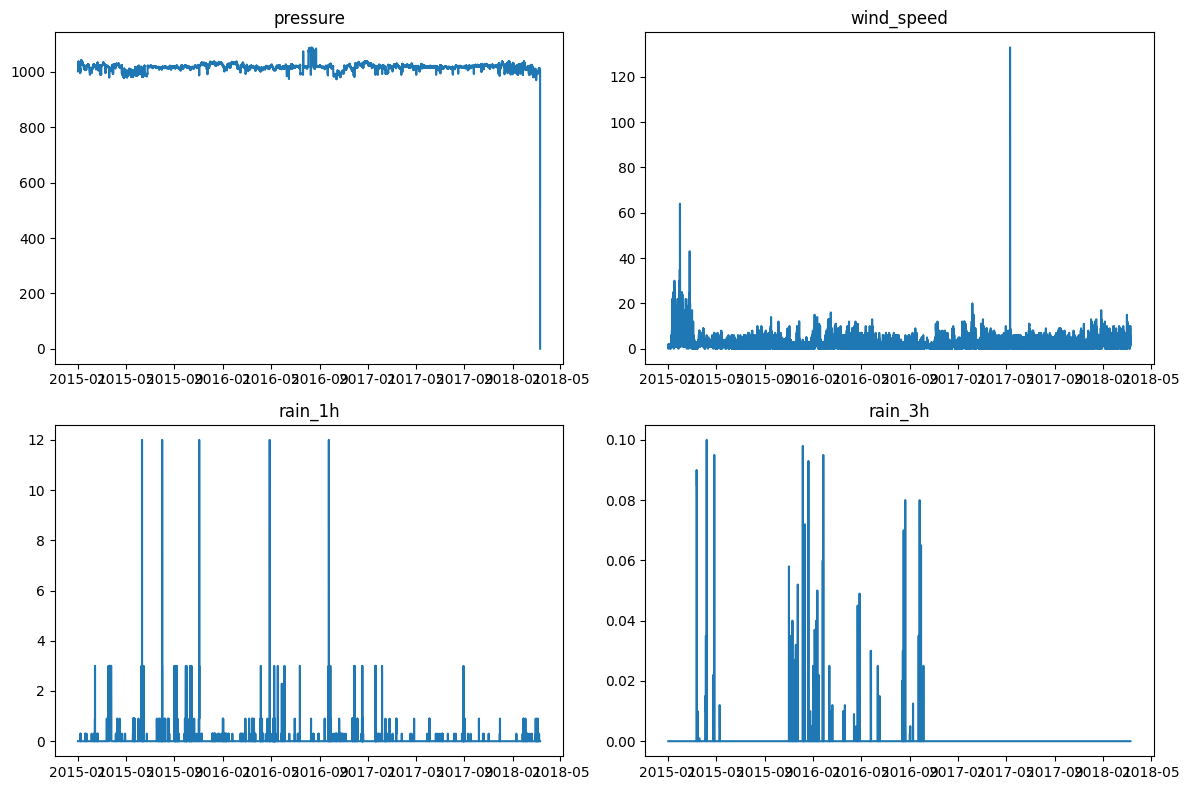

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.plot(df_weather.index, df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


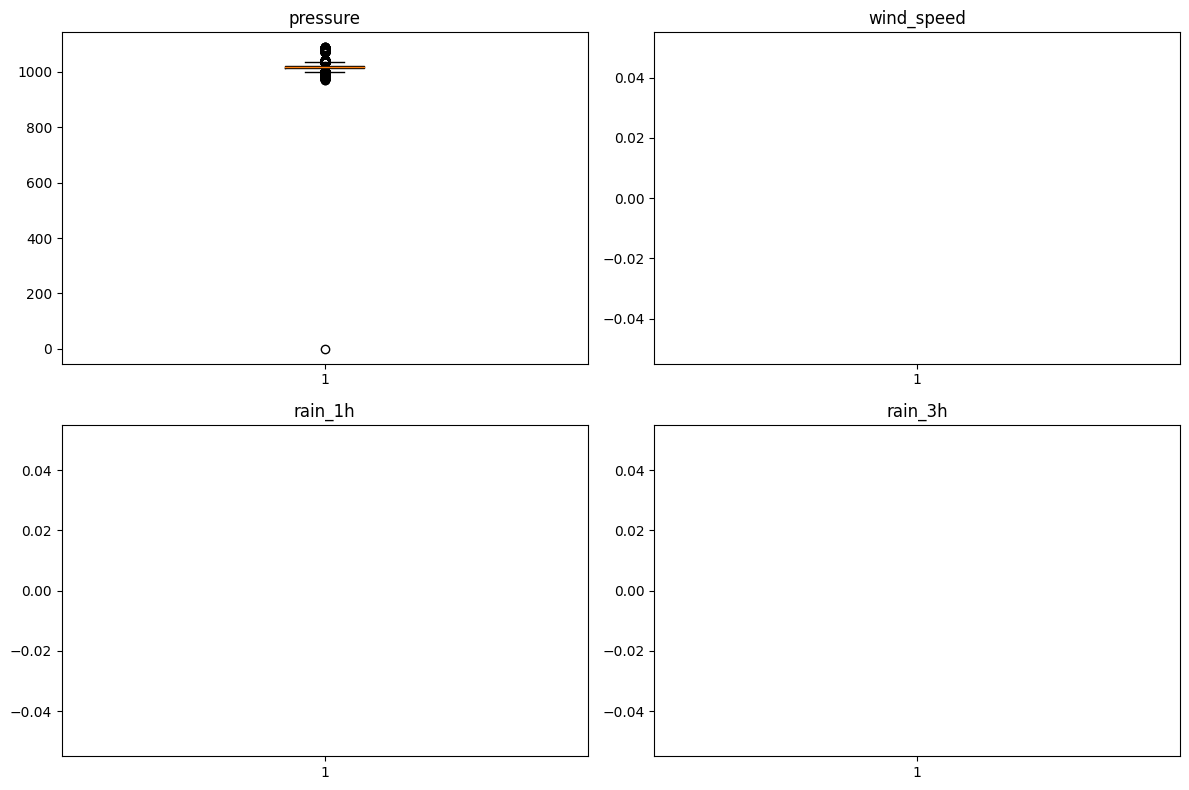

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# select the columns to plot
columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

# loop through the subplots and plot each column
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the plot

In [ ]:
df_weather.loc[df_weather['pressure']  > 1080,  'pressure'] = np.nan
df_weather.loc[df_weather['pressure']   < 870,  'pressure'] = np.nan
df_weather.loc[df_weather['wind_speed'] > 113, 'wind_speed'] = np.nan

df_weather.interpolate(method ='linear', limit_direction ='forward', inplace = True)

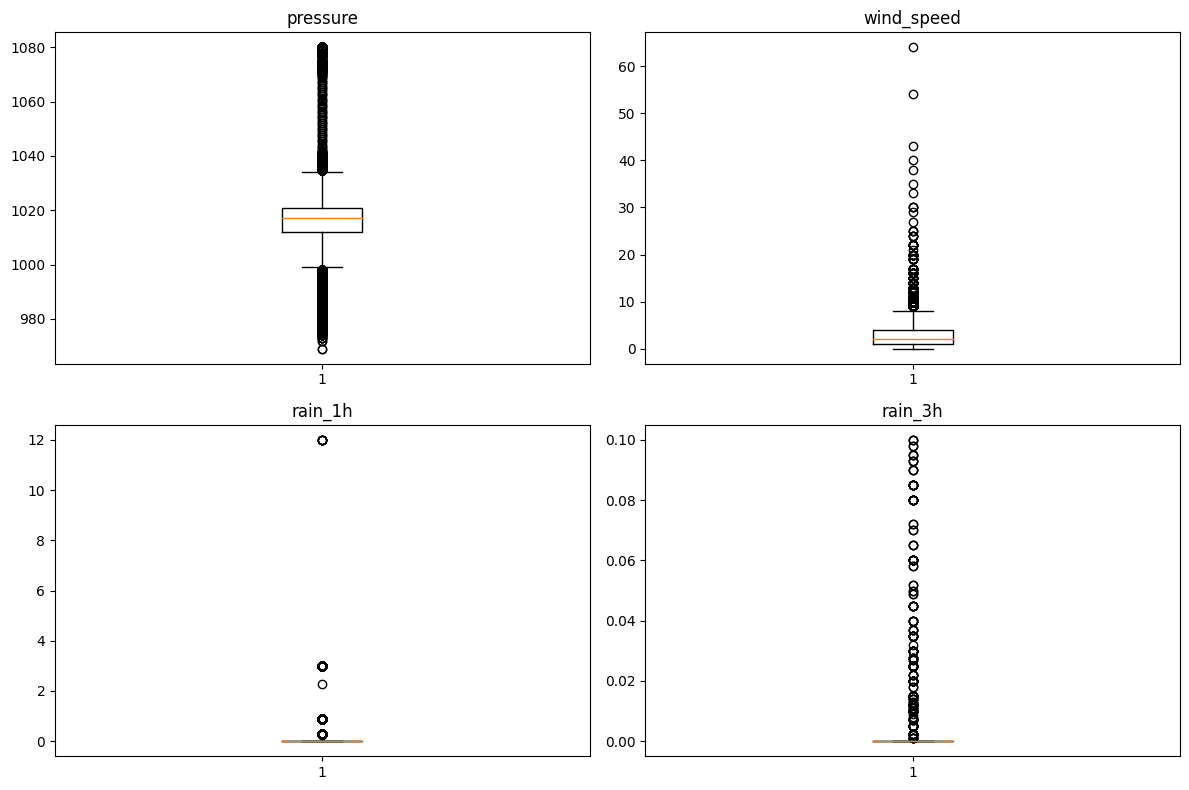

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# select the columns to plot
columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

# loop through the subplots and plot each column
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the plot

In [ ]:
# be sure to drop rain_h3
df_weather.drop(['rain_3h'], axis = 1 , inplace = True)

In [ ]:
print(f'Number of samples in df_energy is {energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 5862
Number of samples in df_weather in Valencia is 28023


In [ ]:
df_weather_cleaned = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='first').set_index('time')

In [ ]:
df_weather_cleaned

,city_name,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_3h,clouds_all
time,,,,,,,,,
2015-01-01 00:00:00+01:00,Valencia,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2015-01-01 01:00:00+01:00,Valencia,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0
2015-01-01 02:00:00+01:00,Valencia,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
2015-01-01 03:00:00+01:00,Valencia,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
2015-01-01 04:00:00+01:00,Valencia,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-03-10 19:00:00+01:00,Valencia,290.150,1004.0,72.0,5.0,300.0,0.0,0.0,75.0
2018-03-10 20:00:00+01:00,Valencia,290.150,1005.0,67.0,2.0,210.0,0.0,0.0,40.0
2018-03-10 21:00:00+01:00,Valencia,290.150,1005.0,63.0,4.0,220.0,0.0,0.0,40.0


In [ ]:
print(f'Number of samples in df_energy is {energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather_cleaned.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 5862
Number of samples in df_weather in Valencia is 27960


In [ ]:
df_weather_all_cities = [grouped_weather.get_group(x) for x in grouped_weather.groups]

In [ ]:
df_weather_energy = energy

for df_city in df_weather_all_cities:
    city_name = df_city.iloc[0]['city_name'].replace(' ', '')
    df_temp_city = df_city.add_suffix(f'_convert_{city_name}')
    df_weather_energy = pd.concat([df_weather_energy, df_temp_city], axis=1)
    df_weather_energy = df_weather_energy.drop(f'city_name_convert_{city_name}' , axis=1)


In [ ]:
df_weather_energy.columns

Index(['time', 'generation biomass', 'generation fossil gas',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'Energy Consumption',
       'generation fossil total', 'temp_convert_Valencia',
       'pressure_convert_Valencia', 'humidity_convert_Valencia',
       'wind_speed_convert_Valencia', 'wind_deg_convert_Valencia',
       'rain_1h_convert_Valencia', 'snow_3h_convert_Valencia',
       'clouds_all_convert_Valencia'],
      dtype='object')

In [ ]:
check_Nans_Dups(df_weather_energy)

Number of Nans in each column :
time                                           27960
generation biomass                             27960
generation fossil gas                          27960
generation fossil oil                          27960
generation hydro pumped storage consumption    27960
generation hydro run-of-river and poundage     27960
generation hydro water reservoir               27960
generation nuclear                             27960
generation other                               27960
generation other renewable                     27960
generation solar                               27960
generation waste                               27960
generation wind onshore                        27960
Energy Consumption                             27960
generation fossil total                        27960
temp_convert_Valencia                           5862
pressure_convert_Valencia                       5862
humidity_convert_Valencia                       5862
wind_speed_con

In [ ]:

df_weather_energy['hour'] = df_weather_energy.index.map(lambda x : x.hour)
df_weather_energy['weekday'] = df_weather_energy.index.map(lambda x : x.weekday())
df_weather_energy['month'] = df_weather_energy.index.map(lambda x : x.month)
df_weather_energy['year'] = df_weather_energy.index.map(lambda x: x.year)

In [ ]:
df_weather_energy.head(100)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_weather_energy.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Weather and Energy Data')
plt.show()


ValueError: could not convert string to float: '2015-01-01 00:00:00+01:00'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'generation biomass',
    'generation fossil gas',
    'generation fossil oil',
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage',
    'generation hydro water reservoir',
    'generation nuclear',
    'generation other',
    'generation other renewable',
    'generation solar',
    'generation waste',
    'generation wind onshore',
    'Energy Consumption',
    'generation fossil total'
}

# Create a DataFrame
df = pd.DataFrame(data, index=[0])

# Generate heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df.drop(columns=['temp_convert_Bilbao', 'pressure_convert_Bilbao', 'humidity_convert_Bilbao',
                                 'wind_speed_convert_Bilbao', 'wind_deg_convert_Bilbao', 'rain_1h_convert_Bilbao',
                                 'snow_3h_convert_Bilbao', 'clouds_all_convert_Bilbao'])
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='', linewidths=.5)
plt.title('Heatmap for Bilbao City')
plt.show()


ValueError: Shape of passed values is (14, 1), indices imply (1, 1)

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plots
num_features = len(features)
fig, axes = plt.subplots(5, num_features, figsize=(5 * num_features, 5))

for ax, feature in zip(axes, features):
    plt.scatter(feature,'Energy Consumption', color='blue', marker='o')
    ax.set_xlabel(feature)
    ax.set_ylabel('Energy Consumption')
    # ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot line plot
sns.lineplot(data=df_weather_energy, x='year', y='Energy Consumption', lw=2)

# Add labels and title
plt.title('Variations in Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
pre_data=df_weather_energy['Energy Consumption'];
pre_data.plot(figsize=(12,6))



In [ ]:
# y_2015 = df_weather_energy.loc['2015-01-01 00:00:00+01:00':'2015-12-31 00:00:00+01:00']
# pre_data=y_2015['Energy Consumption'];
# pre_data.plot(figsize=(12,6))

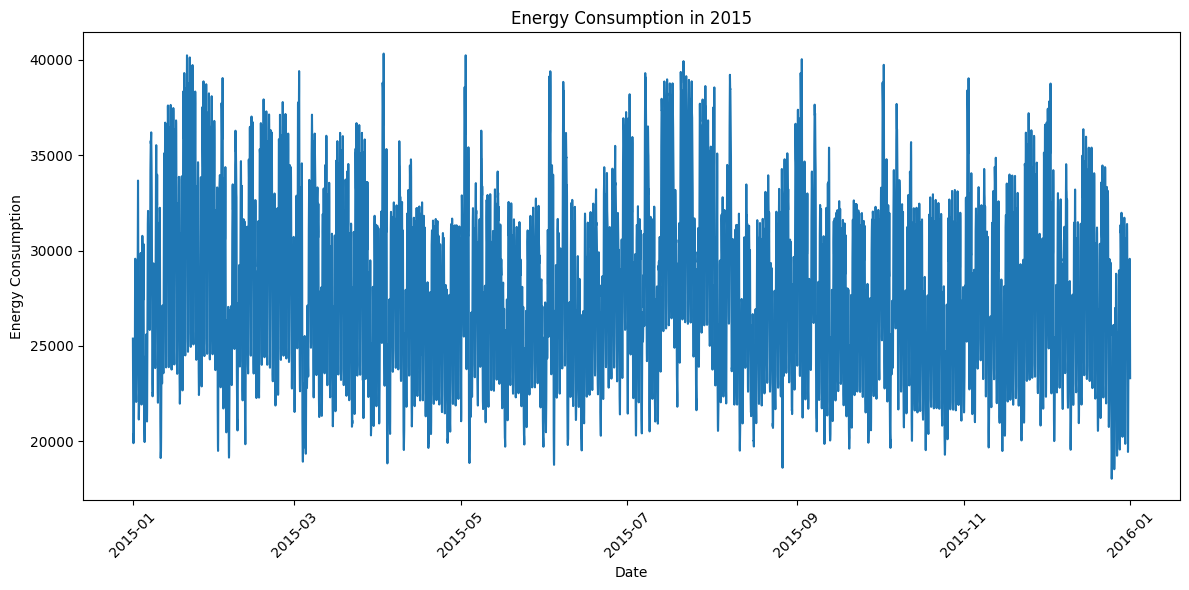

In [ ]:
y_2015 = df_weather_energy[df_weather_energy['year'] == 2015]

# Plot the energy consumption data
plt.figure(figsize=(12, 6))
plt.plot( y_2015['Energy Consumption'])
plt.title('Energy Consumption in 2015')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming df_weather_energy is already defined and contains 'Energy Consumption' column
testtraindata = pd.DataFrame()  # Ensure testtraindata is an empty DataFrame

# Add 'energy consumption' column to testtraindata
testtraindata['energy consumption'] = df_weather_energy['Energy Consumption'].values

# Define the number of lag periods
num_lags = 7

# Add lagged columns to testtraindata
for lag in range(1, num_lags + 1):
    testtraindata[f'lag_{lag}'] = testtraindata['energy consumption'].shift(lag)

# Display the first few rows to check if the lagged columns are populated
print(testtraindata.head(30))
print(testtraindata.columns)  # Check the column names


    energy consumption    lag_1    lag_2    lag_3    lag_4    lag_5    lag_6  \
0              25385.0      NaN      NaN      NaN      NaN      NaN      NaN   
1              24382.0  25385.0      NaN      NaN      NaN      NaN      NaN   
2              22734.0  24382.0  25385.0      NaN      NaN      NaN      NaN   
3              21286.0  22734.0  24382.0  25385.0      NaN      NaN      NaN   
4              20264.0  21286.0  22734.0  24382.0  25385.0      NaN      NaN   
5              19905.0  20264.0  21286.0  22734.0  24382.0  25385.0      NaN   
6              20010.0  19905.0  20264.0  21286.0  22734.0  24382.0  25385.0   
7              20377.0  20010.0  19905.0  20264.0  21286.0  22734.0  24382.0   
8              20094.0  20377.0  20010.0  19905.0  20264.0  21286.0  22734.0   
9              20637.0  20094.0  20377.0  20010.0  19905.0  20264.0  21286.0   
10             22250.0  20637.0  20094.0  20377.0  20010.0  19905.0  20264.0   
11             23547.0  22250.0  20637.0

In [ ]:
testtraindata.reset_index(drop=True, inplace=True)
testtraindata.head(30)

,energy consumption,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,25385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24382.0,25385.0,NaN,NaN,NaN,NaN,NaN,NaN
2,22734.0,24382.0,25385.0,NaN,NaN,NaN,NaN,NaN
3,21286.0,22734.0,24382.0,25385.0,NaN,NaN,NaN,NaN
4,20264.0,21286.0,22734.0,24382.0,25385.0,NaN,NaN,NaN
5,19905.0,20264.0,21286.0,22734.0,24382.0,25385.0,NaN,NaN
6,20010.0,19905.0,20264.0,21286.0,22734.0,24382.0,25385.0,NaN
7,20377.0,20010.0,19905.0,20264.0,21286.0,22734.0,24382.0,25385.0
8,20094.0,20377.0,20010.0,19905.0,20264.0,21286.0,22734.0,24382.0
9,20637.0,20094.0,20377.0,20010.0,19905.0,20264.0,21286.0,22734.0


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Split data into train and test sets
train_size = int(len(testtraindata) * 0.8)
train, test = testtraindata[:train_size], testtraindata[train_size:]


In [ ]:
data_without_index = testtraindata.values
testtraindata_no_index = pd.DataFrame(data_without_index, columns=testtraindata.columns)


In [ ]:
X_train=train.drop(['energy consumption'],axis=1)
y_train=train['energy consumption']
X_test=test.drop(['energy consumption'],axis=1)
y_test=test['energy consumption']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# Assuming testtraindata contains the lagged columns and the target 'energy consumption'
# Drop rows with NaN values generated by shifting
testtraindata.dropna(inplace=True)

# Define features and target
features = testtraindata.drop(['energy consumption'], axis=1)
target = testtraindata['energy consumption']

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, shuffle=False)

# Reshape input to be 3D (samples, timesteps, features) as required by LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
28045/28045 [==============================] - 194s 7ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 2/10
28045/28045 [==============================] - 202s 7ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 3/10
28045/28045 [==============================] - 201s 7ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 4/10
28045/28045 [==============================] - 198s 7ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 5/10
28045/28045 [==============================] - 193s 7ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/10
28045/28045 [==============================] - 195s 7ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 7/10
28045/28045 [==============================] - 196s 7ms/step - loss: 0.0012 - val_loss: 9.6140e-04
Epoch 8/10
28045/28045 [==============================] - 195s 7ms/step - loss: 0.0011 - val_loss: 8.9193e-04
Epoch 9/10
28045/28045 [==============================] - 199s 7ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 10/10
28045/28045 [=============

220/220 [==============================] - 1s 6ms/step


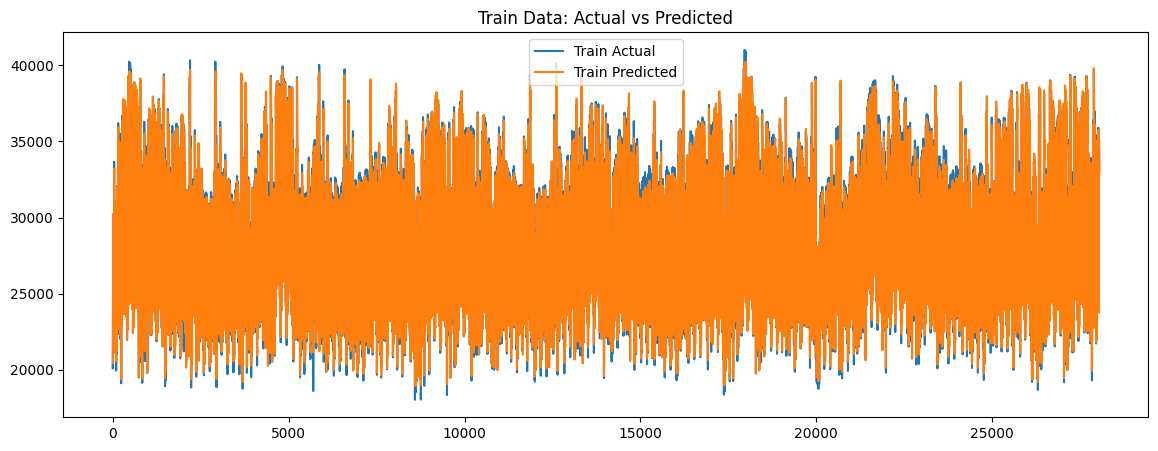

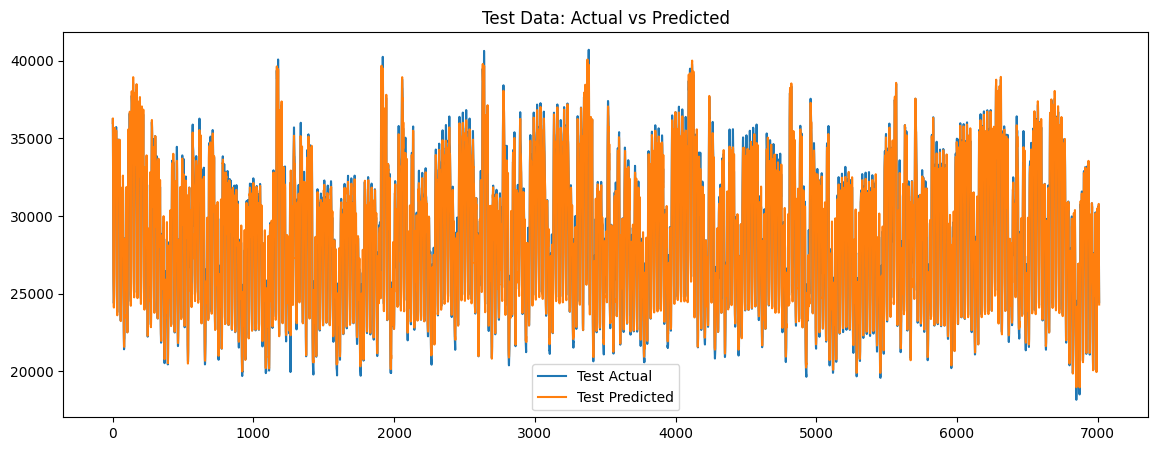

In [ ]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_train, label='Train Actual')
plt.plot(train_predictions, label='Train Predicted')
plt.title('Train Data: Actual vs Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Test Actual')
plt.plot(test_predictions, label='Test Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, test_predictions )


rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
df_weather_energy['Energy Consumption'].mean()

RMSE: 686.7052247561234


28698.281385466576

In [ ]:
!pip install pmdarima


In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(arimaa['Energy Consumption'])

In [ ]:

from pmdarima import auto_arima
stepwise_fit = auto_arima(testtraindata['energy consumption'], trace=True,
suppress_warnings=True)

In [ ]:
train_data = cleaned_data.iloc[:-2000]  # All data except the last 20 entries
test_data =  cleaned_data.iloc[-2000:]
train_data.shape, test_data.shape

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(cleaned_data['Energy Consumption'], order=(1, 0, 5))
model = model.fit()
model.summary()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test_data['Energy Consumption'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data['Energy Consumption'], pred )


rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(test_data['Energy Consumption'], pred)
rmse = np.sqrt(mse)

r2_score = 1 - (mse / np.var(test_data['Energy Consumption']))

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2_score}')

In [ ]:
def create_lagged_features(df, lags):
    """
    Create lagged features for a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame with original features.
    lags (int): The number of lagged time steps to include.

    Returns:
    DataFrame: DataFrame with lagged features.
    """
    lagged_df = pd.DataFrame()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f'{col}_lag{lag}'] = df[col].shift(lag)

    # Drop rows with NaN values caused by the lagging
    lagged_df.dropna(inplace=True)

    return lagged_df


In [ ]:
def predict_energy(file=None, lags=5, **kwargs):
    if file is not None:
        # Handle CSV file input
        input_data = pd.read_csv(file)
    else:
        # Handle manual input
        input_data = pd.DataFrame([kwargs])

    # Ensure columns are in the correct order
    input_data = input_data[features]

    # Create lagged features
    lagged_data = create_lagged_features(input_data, lags)

    # Check if lagged_data is empty due to insufficient data
    if lagged_data.empty:
        return "Insufficient data to create lagged features. Please provide more historical data."

    # Convert the lagged data to the format required by the LSTM
    # LSTM expects data in the shape (samples, timesteps, features)
    # Assuming 'samples' is 1 because we are predicting for one instance at a time
    input_data = np.array(lagged_data).reshape((lagged_data.shape[0], lags, len(features)))

    # Predict energy consumption
    predictions = model.predict(input_data)

    # Convert predictions to a list for better readability
    predictions = predictions.flatten().tolist()
    return predictions


In [ ]:
model

In [ ]:
import pandas as pd
import numpy as np

def create_lagged_features(df, lags):
    """
    Create lagged features for a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame with original features.
    lags (int): The number of lagged time steps to include.

    Returns:
    DataFrame: DataFrame with lagged features.
    """
    # Interpolate missing values along each row
    df = df.interpolate(axis=1)

    lagged_df = pd.DataFrame()
    for col in df.columns:
        for lag in range(1, lags + 2):  # Adjust the range to iterate up to lags+1
            lagged_df[f'lag{lag}'] = df[col].shift(lag)
    print(lagged_df)
    # Drop rows with NaN values caused by the lagging
    lagged_df = lagged_df.dropna()

    return lagged_df


def predict_energy(file=None, lags=5, **kwargs):
    features = [
        'generation-biomass', 'generation-fossil-gas', 'generation-fossil-oil',
        'generation-hydro-pumped-storage-consumption', 'generation-hydro-run-of-river-and-poundage',
        'generation-hydro-water-reservoir', 'generation-nuclear', 'generation-other',
        'generation-other-renewable', 'generation-solar', 'generation-waste'
    ]

    # Define a dummy model for testing
     # Replace None with your actual model

    if file is not None:
        # Handle CSV file input
        input_data = pd.read_csv(file)
    else:
        # Restructure manual input data
        days_data = []
        for day in range(1, lags + 3):
            day_data = {feature: kwargs.get(f'{feature}_day{day}', 0) for feature in features}
            days_data.append(day_data)

        # Create a DataFrame for the days' data
        input_data = pd.DataFrame(days_data)

    # Sum each row to get total energy consumption per day
    input_data['Energy Consumption'] = input_data.sum(axis=1)

    # Create lagged features for 'Energy Consumption'
    lagged_data = create_lagged_features(input_data, lags)

    # Check if lagged_data is empty due to insufficient data
    if lagged_data.empty:
        return "Insufficient data to create lagged features. Please provide more historical data."

    # Convert the lagged data to the format required by the LSTM
    # LSTM expects data in the shape (samples, timesteps, features)
    # Assuming 'samples' is 1 because we are predicting for one instance at a time
    input_data = np.array(lagged_data).reshape((lagged_data.shape[0], lags + 1, 1))  # Adjust the shape to include lags+1

    # Predict energy consumption
    if model is not None:
        predictions = model.predict(input_data)
        predictions = predictions.flatten().tolist()
        return predictions
    else:
        return "Model is not defined. Please define and load your model before prediction."


# Define manual input components for Gradio
manual_inputs = []
for day in range(1, 6):
    for feature in features:
        manual_inputs.append(gr.Slider(
            minimum=0, maximum=1000, step=0.1,
            label=f'{feature.replace("_", " ").capitalize()} (Day {day})',
            value=0  # Use `value` instead of `default`
        ))

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_energy,
    inputs=[gr.File(label="Upload CSV File (Optional)", type="filepath")] + manual_inputs,
    outputs=gr.Textbox(label="Predicted Energy Consumption"),
    title="Energy Consumption Prediction using LSTM with Lagged Features",
    description="Predict energy consumption from power generation data. You can either upload a CSV file or manually input the data for the last few time steps. The model will use lagged features to make predictions."
)

# Launch the interface
interface.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1008: UserWarning: Expected maximum 2 arguments for function <function predict_energy at 0x7ca428ce7400>, received 56.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://b70454c0719bc439f7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import numpy as np

def create_lagged_features(df, lags):
    """
    Create lagged features for a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame with original features.
    lags (int): The number of lagged time steps to include.

    Returns:
    DataFrame: DataFrame with lagged features.
    """
    # Interpolate missing values along each row
    df = df.interpolate(axis=1)

    lagged_df = pd.DataFrame()
    for col in df.columns:
        for lag in range(1, lags + 2):  # Adjust the range to iterate up to lags+1
            lagged_df[f'lag{lag}'] = df[col].shift(lag)
    print(lagged_df)
    # Drop rows with NaN values caused by the lagging
    lagged_df = lagged_df.dropna()

    return lagged_df


def predict_energy(file=None, lags=5, **kwargs):
    features = [
        'generation-biomass', 'generation-fossil-gas', 'generation-fossil-oil',
        'generation-hydro-pumped-storage-consumption', 'generation-hydro-run-of-river-and-poundage',
        'generation-hydro-water-reservoir', 'generation-nuclear', 'generation-other',
        'generation-other-renewable', 'generation-solar', 'generation-waste'
    ]

    # Define a dummy model for testing
     # Replace None with your actual model

    if file is not None:
        # Handle CSV file input
        input_data = pd.read_csv(file)
    else:
        # Restructure manual input data
        days_data = []
        for day in range(1, lags + 3):
            day_data = {feature: kwargs.get(f'{feature}_day{day}', 0) for feature in features}
            days_data.append(day_data)

        # Create a DataFrame for the days' data
        input_data = pd.DataFrame(days_data)

    # Sum each row to get total energy consumption per day
    input_data['Energy Consumption'] = input_data.sum(axis=1)

    # Create lagged features for 'Energy Consumption'
    lagged_data = create_lagged_features(input_data, lags)

    # Check if lagged_data is empty due to insufficient data
    if lagged_data.empty:
        return "Insufficient data to create lagged features. Please provide more historical data."

    # Convert the lagged data to the format required by the LSTM
    # LSTM expects data in the shape (samples, timesteps, features)
    # Assuming 'samples' is 1 because we are predicting for one instance at a time
    input_data = np.array(lagged_data).reshape((lagged_data.shape[0], lags + 1, 1))  # Adjust the shape to include lags+1

    # Predict energy consumption
    if model is not None:
        predictions = model.predict(input_data)
        predictions = predictions.flatten().tolist()
        return predictions
    else:
        return "Model is not defined. Please define and load your model before prediction."


In [ ]:
import numpy as np
import pandas as pd
import gradio as gr
from keras.models import load_model

# Load your LSTM model (replace with your actual model path)
# model = load_model('path/to/your/lstm_model.h5')

# List of features used by the model
features = [
    'generation biomass', 'generation fossil gas', 'generation fossil oil',
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage',
    'generation hydro water reservoir', 'generation nuclear',
    'generation other', 'generation other renewable', 'generation solar',
    'generation waste'
]

def create_lagged_features(df, lags):
    """
    Create lagged features for a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame with original features.
    lags (int): The number of lagged time steps to include.

    Returns:
    DataFrame: DataFrame with lagged features.
    """
    lagged_df = pd.DataFrame()
    for col in df.columns:
        for lag in range(1, lags + 1):
            lagged_df[f'{col}_lag{lag}'] = df[col].shift(lag)

    # Drop rows with NaN values caused by the lagging


    return lagged_df

def predict_energy(file=None, lags=5, **kwargs):
    if file is not None:
        # Handle CSV file input
        input_data = pd.read_csv(file)
    else:
        # Handle manual input
        # Extract inputs for the last 5 days for each feature
        energy_consumption = []
        for day in range(1, lags + 1):
            daily_sum = sum([kwargs[f'{feature}_day{day}'] for feature in features])
            energy_consumption.append(daily_sum)

        # Create a DataFrame with the summed energy consumption for each day
        input_data = pd.DataFrame({'Energy Consumption': energy_consumption})
        print(input_data)  # Optional: For debugging

    # Create lagged features for 'Energy Consumption'
    lagged_data = create_lagged_features(input_data, lags)

    # Check if lagged_data is empty due to insufficient data
    if lagged_data.empty:
        return "Insufficient data to create lagged features. Please provide more historical data."

    # Convert the lagged data to the format required by the LSTM
    # LSTM expects data in the shape (samples, timesteps, features)
    # Assuming 'samples' is 1 because we are predicting for one instance at a time
    input_data = np.array(lagged_data).reshape((lagged_data.shape[0], lags, 1))  # 1 feature: 'Energy Consumption'

    # Predict energy consumption
    predictions = model.predict(input_data)

    # Convert predictions to a list for better readability
    predictions = predictions.flatten().tolist()
    return predictions

In [ ]:
from sklearn.metrics import r2_score

# Calculate R^2 score for training set
train_r2 = r2_score(y_train, train_predictions)

# Calculate R^2 score for testing set
test_r2 = r2_score(y_test, test_predictions)

print(f'Train R^2 Score: {train_r2}')
print(f'Test R^2 Score: {test_r2}')


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def greet(name, intensity):
    return "Hello, " + name + "!" * int(intensity)

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
)

demo.launch()

In [ ]:
import gradio as gr

# Assuming features list, predict_energy function, and create_lagged_features function are defined

# Define manual input components for Gradio
manual_inputs = [gr.Number(label=feature.replace('_', ' ').capitalize()) for feature in features]

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_energy,
    inputs=[gr.inputs.File(label="Upload CSV File (Optional)", optional=True)] + manual_inputs,
    outputs=gr.outputs.Textbox(label="Predicted Energy Consumption"),
    title="Energy Consumption Prediction using LSTM with Lagged Features",
    description="Predict energy consumption from power generation data. You can either upload a CSV file or manually input the data for the last few time steps. The model will use lagged features to make predictions."
)

# Launch the interface
interface.launch()

In [ ]:
testtraindata.head()

In [ ]:
!pip install --upgrade gradio


In [ ]:
import pandas as pd
import numpy as np

def create_lagged_features(df, lags):
    """
    Create lagged features for a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame with original features.
    lags (int): The number of lagged time steps to include.

    Returns:
    DataFrame: DataFrame with lagged features.
    """
    # Interpolate missing values along each row
    df = df.interpolate(axis=1)

    lagged_df = pd.DataFrame()
    for col in df.columns:
        for lag in range(1, lags + 2):  # Adjust the range to iterate up to lags+1
            lagged_df[f'lag{lag}'] = df[col].shift(lag)
    print(lagged_df)
    # Drop rows with NaN values caused by the lagging
    lagged_df = lagged_df.dropna()

    return lagged_df


def predict_energy(file=None, lags=5, **kwargs):
    features = [
        'generation-biomass', 'generation-fossil-gas', 'generation-fossil-oil',
        'generation-hydro-pumped-storage-consumption', 'generation-hydro-run-of-river-and-poundage',
        'generation-hydro-water-reservoir', 'generation-nuclear', 'generation-other',
        'generation-other-renewable', 'generation-solar', 'generation-waste'
    ]

    # Define a dummy model for testing
     # Replace None with your actual model

    if file is not None:
        # Handle CSV file input
        input_data = pd.read_csv(file)
    else:
        # Restructure manual input data
        days_data = []
        for day in range(1, lags + 3):
            day_data = {feature: kwargs.get(f'{feature}_day{day}', 0) for feature in features}
            days_data.append(day_data)

        # Create a DataFrame for the days' data
        input_data = pd.DataFrame(days_data)

    # Sum each row to get total energy consumption per day
    input_data['Energy Consumption'] = input_data.sum(axis=1)

    # Create lagged features for 'Energy Consumption'
    lagged_data = create_lagged_features(input_data, lags)

    # Check if lagged_data is empty due to insufficient data
    if lagged_data.empty:
        return "Insufficient data to create lagged features. Please provide more historical data."

    # Convert the lagged data to the format required by the LSTM
    # LSTM expects data in the shape (samples, timesteps, features)
    # Assuming 'samples' is 1 because we are predicting for one instance at a time
    input_data = np.array(lagged_data).reshape((lagged_data.shape[0], lags + 1, 1))  # Adjust the shape to include lags+1

    # Predict energy consumption
    if model is not None:
        predictions = model.predict(input_data)
        predictions = predictions.flatten().tolist()
        return predictions
    else:
        return "Model is not defined. Please define and load your model before prediction."


# Define input data for the last seven days
input_data = {
    'generation-biomass_day1': 100,
    'generation-fossil-gas_day1': 200,
    'generation-fossil-oil_day1': 150,
    'generation-hydro-pumped-storage-consumption_day1': 120,
    'generation-hydro-run-of-river-and-poundage_day1': 80,
    'generation-hydro-water-reservoir_day1': 180,
    'generation-nuclear_day1': 250,
    'generation-other_day1': 90,
    'generation-other-renewable_day1': 300,
    'generation-solar_day1': 400,
    'generation-waste_day1': 110,
    'generation-biomass_day2': 110,
    'generation-fossil-gas_day2': 210,
    'generation-fossil-oil_day2': 160,
    'generation-hydro-pumped-storage-consumption_day2': 130,
    'generation-hydro-run-of-river-and-poundage_day2': 90,
    'generation-hydro-water-reservoir_day2': 190,
    'generation-nuclear_day2': 260,
    'generation-other_day2': 100,
    'generation-other-renewable_day2': 310,
    'generation-solar_day2': 420,
    'generation-waste_day2': 120,
    'generation-biomass_day3': 120,
    'generation-fossil-gas_day3': 220,
    'generation-fossil-oil_day3': 170,
    'generation-hydro-pumped-storage-consumption_day3': 140,
    'generation-hydro-run-of-river-and-poundage_day3': 100,
    'generation-hydro-water-reservoir_day3': 200,
    'generation-nuclear_day3': 270,
    'generation-other_day3': 110,
    'generation-other-renewable_day3': 320,
    'generation-solar_day3': 430,
    'generation-waste_day3': 130,
    'generation-biomass_day4': 130,
    'generation-fossil-gas_day4': 230,
    'generation-fossil-oil_day4': 180,
    'generation-hydro-pumped-storage-consumption_day4': 150,
    'generation-hydro-run-of-river-and-poundage_day4': 110,
    'generation-hydro-water-reservoir_day4': 210,
    'generation-nuclear_day4': 280,
    'generation-other_day4': 120,
    'generation-other-renewable_day4': 330,
    'generation-solar_day4': 440,
    'generation-waste_day4': 140,
    'generation-biomass_day5': 140,
    'generation-fossil-gas_day5': 240,
    'generation-fossil-oil_day5': 190,
    'generation-hydro-pumped-storage-consumption_day5': 160,
    'generation-hydro-run-of-river-and-poundage_day5': 120,
    'generation-hydro-water-reservoir_day5': 220,
    'generation-nuclear_day5': 290,
    'generation-other_day5': 130,
    'generation-other-renewable_day5': 340,
   'generation-solar_day4': 440,
    'generation-waste_day4': 140,
    'generation-biomass_day5': 140,
    'generation-fossil-gas_day5': 240,
    'generation-fossil-oil_day5': 190,
    'generation-hydro-pumped-storage-consumption_day5': 160,
    'generation-hydro-run-of-river-and-poundage_day5': 120,
    'generation-hydro-water-reservoir_day5': 220,
    'generation-nuclear_day5': 290,
    'generation-other_day5': 130,
    'generation-other-renewable_day5': 340,
    'generation-solar_day5': 450,
    'generation-waste_day5': 150,
      'generation-biomass_day5': 140,
    'generation-fossil-gas_day5': 240,

}

# Call the predict_energy function with input data
# Ensure the 'model' is defined before calling this function
predictions = predict_energy(lags=5, **input_data)

# Print the predictions
print(predictions)


In [ ]:
# Define input data for the last five days
input_data = {
    'generation-biomass_day1': 100,  # Updated keys with hyphens
    'generation-fossil-gas_day1': 200,
    'generation-fossil-oil_day1': 150,
    'generation-hydro-pumped-storage-consumption_day1': 120,
    'generation-hydro-run-of-river-and-poundage_day1': 80,
    'generation-hydro-water-reservoir_day1': 180,
    'generation-nuclear_day1': 250,
    'generation-other_day1': 90,
    'generation-other-renewable_day1': 300,
    'generation-solar_day1': 400,
    'generation-waste_day1': 110,
    # Day 2
       'generation-biomass_day2': 110,
    'generation-fossil-gas_day2': 210,
    'generation-fossil-oil_day2': 160,
    'generation-hydro-pumped-storage-consumption_day2': 130,
    'generation-hydro-run-of-river-and-poundage_day2': 90,
    'generation-hydro-water-reservoir_day2': 190,
    'generation-nuclear_day2': 260,
    'generation-other_day2': 100,
    'generation-other-renewable_day2': 310,
    'generation-solar_day2': 420,
    'generation-waste_day2': 120,
    'generation-biomass_day2': 110,
    'generation-fossil-gas_day2': 210,
    'generation-fossil-oil_day2': 160,
    'generation-hydro-pumped-storage-consumption_day2': 130,
    'generation-hydro-run-of-river-and-poundage_day2': 90,
    'generation-hydro-water-reservoir_day2': 190,
    'generation-nuclear_day2': 260,
    'generation-other_day2': 100,
    'generation-other-renewable_day2': 310,
    'generation-solar_day2': 420,
    'generation-waste_day2': 120,
       'generation-biomass_day2': 110,
    'generation-fossil-gas_day2': 210,
    'generation-fossil-oil_day2': 160,
    'generation-hydro-pumped-storage-consumption_day2': 130,
    'generation-hydro-run-of-river-and-poundage_day2': 90,
    'generation-hydro-water-reservoir_day2': 190,
    'generation-nuclear_day2': 260,
    'generation-other_day2': 100,
    'generation-other-renewable_day2': 310,
    'generation-solar_day2': 420,
    'generation-waste_day2': 120,


   'generation-biomass_day2': 110,
    'generation-fossil-gas_day2': 210,
    'generation-fossil-oil_day2': 160,
    'generation-hydro-pumped-storage-consumption_day2': 130,
    'generation-hydro-run-of-river-and-poundage_day2': 90,
    'generation-hydro-water-reservoir_day2': 190,
    'generation-nuclear_day2': 260,
    'generation-other_day2': 100,
    'generation-other-renewable_day2': 310,
    'generation-solar_day2': 420,
    'generation-waste_day2': 120,
    # Continue for days 3, 4, and 5...
}

# Call the predict_energy function with input data
predictions = predict_energy(lags=5, **input_data)

# Print the predictions
print(predictions)


In [ ]:
df_weather_energy

In [ ]:
pmodel = ARIMA(endog=X_train, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# Define the number of lag periods
num_lags = 7

# Check for missing values
if testtraindata['energy consumption'].isnull().any():
    print("Warning: There are missing values in the 'energy consumption' column.")

# Add lagged columns to testtraindata
for lag in range(1, num_lags + 1):
    testtraindata[f'lag_{lag}'] = testtraindata['energy consumption'].shift(lag)

# Display the first few rows to check if the lagged columns are populated
print(testtraindata.head())


In [ ]:
testtraindata.head()

In [ ]:
y_2015 = df_weather_energy.loc[(df_weather_energy['year'] == 2015) | (df_weather_energy['year'] == 2016)]

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Split data into train and test sets
train_size = int(len(df_weather_energy) * 0.8)
train, test = df_weather_energy[:train_size], df_weather_energy[train_size:]


In [ ]:
train_target = train['Energy Consumption']
test_target = test['Energy Consumption']

In [ ]:
# Fit the ARIMA model
model = ARIMA(train_target, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
predictions = model_fit.forecast(steps=len(test_target))

In [ ]:
# Evaluate the model
mae = mean_absolute_error(test_target, predictions)
print(f'Mean Absolute Error: {mae:.3f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_target.index, train_target, label='Train')
plt.plot(test_target.index, test_target, label='Test')
plt.plot(test_target.index, predictions, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Price Actual')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
r2 = r2_score(test_target, predictions)
print(f'R² Score: {r2:.3f}')

In [ ]:
arima does not perform well , Lstm was better which has given the RMSE: 686.7052247561234
28698.281385466576

**arima does not perform well , Lstm is better which has given the RMSE: 686.7052247561234 and the mean of the test data is 28698.281385466576**

In [ ]:
# energy

In [ ]:
# df_weather_cleaned

In [ ]:
# newweather=df_weather_cleaned.drop(['city_name'],axis=1)

In [ ]:
# df_weather_cleaned.columns

In [ ]:
# energy.columns

In [ ]:
# last_row = df_weather_cleaned.iloc[-1]
# print(last_row)

In [ ]:
# last_five_rows = newweather.tail(5)
# print(last_five_rows)

In [ ]:
# energy.tail(5)

In [ ]:
# energynew= pd.read_csv('/content/energy_dataset.csv')

In [ ]:
# energynew.tail(5)

In [ ]:
# import pandas as pd

# # Assuming energy is your energy dataset and the other dataset is named "weather"
# # Merging on the index
# merged_data = pd.concat([energy, newweather], axis=1)

# # Printing the merged data
# print(merged_data)

In [ ]:
# # Reset the indices of energy and newweather
# energy_reset_index = energy.reset_index(drop=True)
# newweather_reset_index = newweather.reset_index(drop=True)

# # Merge the reset DataFrames
# merged_data = pd.concat([energy_reset_index, newweather_reset_index], axis=1)

In [ ]:
# merged_data

In [ ]:
# merged_data.tail(5)